In [41]:
import os
import numpy as np
import tensorflow.compat.v1 as tfv1
tfv1.disable_v2_behavior()

# 일관된 출력을 위해 유사난수 초기화
def reset_graph(seed=42):
    tfv1.reset_default_graph()
    tfv1.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='AppleGothic')  # MacOS
# matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

In [42]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [47]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg")
dataset = np.array(china, dtype=np.float32)
height, width, channels = dataset.shape
dataset = dataset.reshape([1, height, width, channels])

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

# Create a graph with input X plus a convolutional layer applying the 2 filters
X = tfv1.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tfv1.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tfv1.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

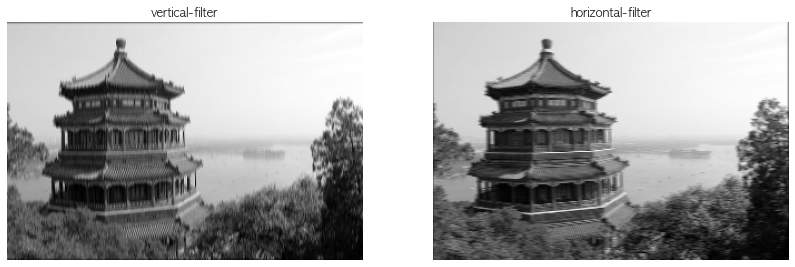

In [48]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
pl_images = [
    output[0, :, :, 0],  # vertical-filter
    output[0, :, :, 1],  # horizontal-filter
]

titles = ['vertical-filter', 'horizontal-filter']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')

In [53]:
import tensorflow as tfv2

reset_graph()

X = tfv1.placeholder(tf.float32, shape=[None, height, width, channels])
conv = tfv1.layers.conv2d(X, filters=2, kernel_size=7, strides=[2, 2], padding='SAME', 
                             kernel_initializer=tfv2.initializers.GlorotUniform())

with tfv1.Session() as sess:
    tfv1.global_variables_initializer().run()
    output = conv.eval(feed_dict={X: dataset})

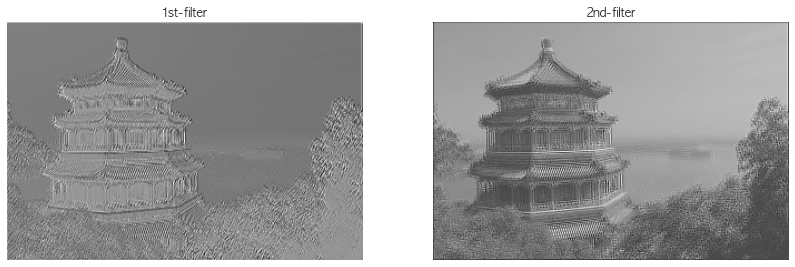

In [54]:
# matplotlib으로 plotting하기
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
pl_images = [
    output[0, :, :, 0],  # vertical-filter
    output[0, :, :, 1],  # horizontal-filter
]

titles = ['1st-filter', '2nd-filter']

for i, (image, title) in enumerate(zip(pl_images, titles)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')